### 创建Tensor

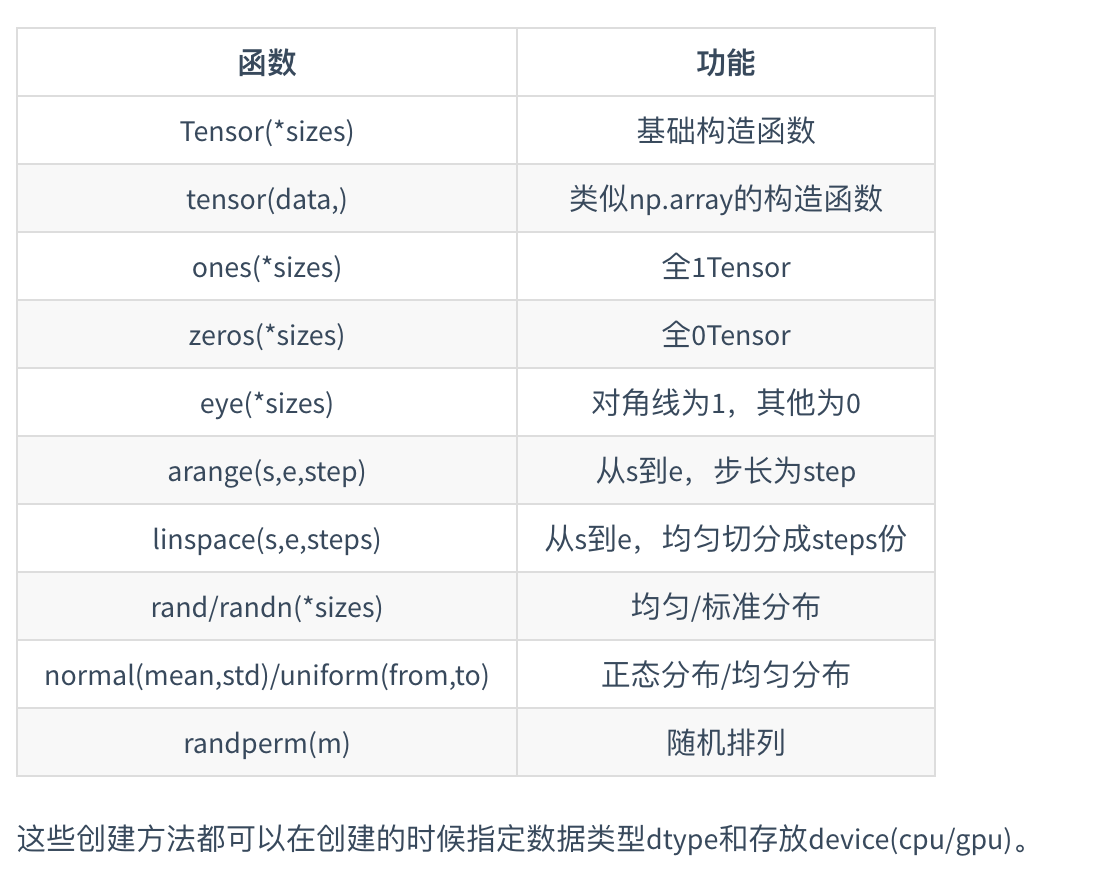

In [9]:
import torch
#创建一个未初始化的Tensor
x=torch.empty(5,3)
print(x)
#创建一个5*3的随机初始化的Tensor
x=torch.rand(5,3)
print(x)
#创建一个5*3的long型全0的Tensor
x=torch.zeros(5,3,dtype=torch.long)
print(x)
#直接跟踪list或者tuple创建tensor
x=torch.Tensor([1,2,3])
print(x)
#通过现有的Tensor来创建，此方法会默认重用输入Tensor的一些属性，例如数据类型，除非自定义数据类型
x=torch.ones(5,3,dtype=torch.float64)
print(x)
y=torch.randn_like(x,dtype=torch.float)#指定新的数据类型
print(y)
#可以通过shape或者size()来获取Tensor的形状
#返回的torch.Size其实就是一个tuple，支持所有tuple的操作
print(x.shape)
print(x.size())

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.1351e-43, 0.0000e+00],
        [4.8792e+01, 4.5595e-41, 1.6797e-37]])
tensor([[0.3343, 0.9623, 0.4030],
        [0.2086, 0.6283, 0.8097],
        [0.1830, 0.2329, 0.6363],
        [0.0983, 0.7715, 0.2640],
        [0.6018, 0.6570, 0.6553]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor([1., 2., 3.])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.6656,  0.0727,  0.9927],
        [-0.2359, -0.6733, -0.8290],
        [-0.5683,  1.3642,  1.7217],
        [-1.3018, -0.2666,  0.1731],
        [ 0.7574, -0.6188, -1.8786]])
torch.Size([5, 3])
torch.Size([5, 3])


### 操作


In [14]:
import torch
#加法

#加法形式一
x=torch.ones(5,3)
y=torch.rand(5,3)
print(x+y)
#加法形式二
print(torch.add(x,y))
result=torch.empty(5,3)
torch.add(x,y,out=result)#指定输入
print(result)
#加法形式三：原地加法
y.add_(x)
print(y)

tensor([[1.7015, 1.9595, 1.6889],
        [1.0041, 1.1286, 1.1112],
        [1.3164, 1.8453, 1.5738],
        [1.0998, 1.1850, 1.6042],
        [1.8152, 1.2457, 1.1252]])
tensor([[1.7015, 1.9595, 1.6889],
        [1.0041, 1.1286, 1.1112],
        [1.3164, 1.8453, 1.5738],
        [1.0998, 1.1850, 1.6042],
        [1.8152, 1.2457, 1.1252]])
tensor([[1.7015, 1.9595, 1.6889],
        [1.0041, 1.1286, 1.1112],
        [1.3164, 1.8453, 1.5738],
        [1.0998, 1.1850, 1.6042],
        [1.8152, 1.2457, 1.1252]])
tensor([[1.7015, 1.9595, 1.6889],
        [1.0041, 1.1286, 1.1112],
        [1.3164, 1.8453, 1.5738],
        [1.0998, 1.1850, 1.6042],
        [1.8152, 1.2457, 1.1252]])


### 索引

我么可以使用类似Numpy的索引操作来访问Tensor的一部分，**需要注意的是：索引出来的结果与原数据共享内存，也即修改一个，另一个会跟着修改。**

In [17]:
import torch

x=torch.rand(5,3)
print(x)
y=x[0,:]
y+=1
print(y)
#源tensor也被改了
print(x[0,:])

tensor([[0.8292, 0.0015, 0.0092],
        [0.1120, 0.3909, 0.4684],
        [0.9968, 0.0814, 0.1661],
        [0.3644, 0.0758, 0.7751],
        [0.5589, 0.0300, 0.5700]])
tensor([1.8292, 1.0015, 1.0092])
tensor([1.8292, 1.0015, 1.0092])


### 改变形状

用view()来改变Tensor的形状

**注意view()返回的新Tensor与源Tensor虽然可能有不同的size，但是是共享data的，也即更改其中的一个，另外一个也会跟着改变。（顾明思义,view仅仅是改变了对这个张量的观察角度，内部数据并未改变）**

如果我们想返回一个真正新的副本（即不共享data内存），可以使用clone创建一个副本然后再使用view

In [20]:
import torch

x=torch.ones(5,3)
y=x.view(15)
z=x.view(-1,5)#-1所指的维度可以根据其他维度的值推出来
print(x.shape,y.shape,z.shape)
x+=1
print(x)
print(y)
#创建副本
x_cp=x.clone().view(15)
x-=1
print(x)
print(x_cp)

torch.Size([5, 3]) torch.Size([15]) torch.Size([3, 5])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


In [22]:
import torch
#item()函数可以将一个标量Tensor转换成一个python number
x=torch.randn(1)
print(x)
print(x.item())

tensor([-0.0047])
-0.0047344909980893135


### 线性代数

PyTorch还支持一些线性函数
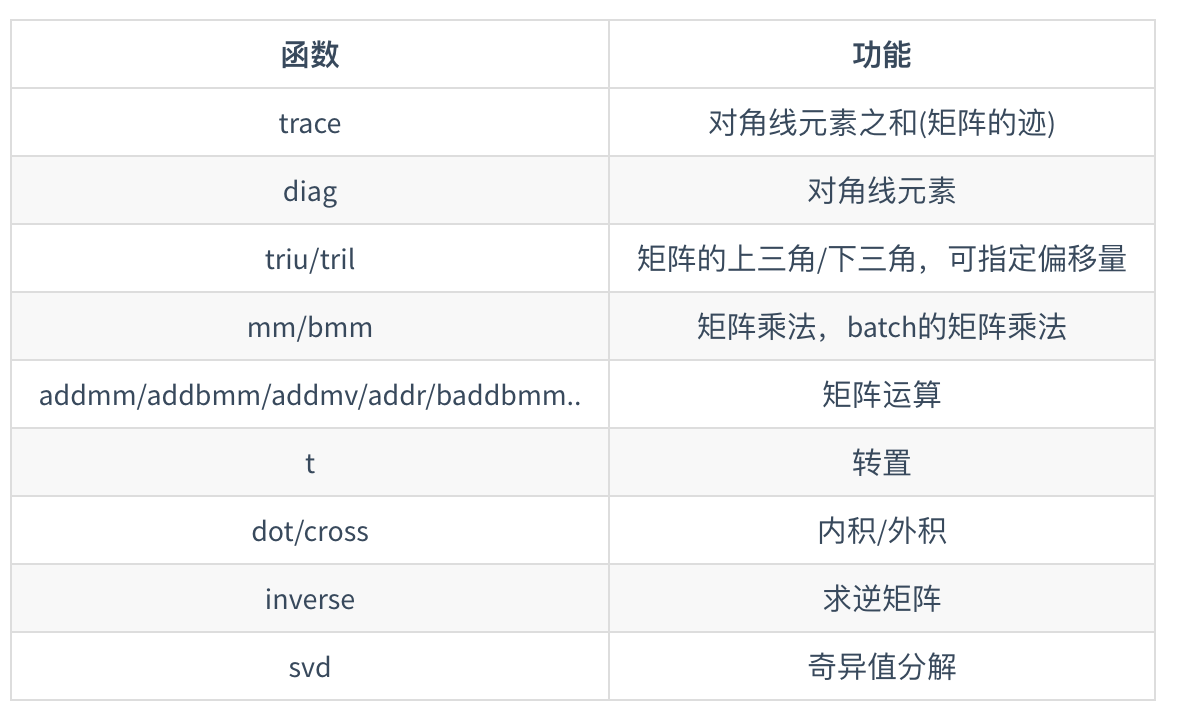

### 广播机制

PyTorch的广播机制和Numpy的类似

In [23]:
import torch

x=torch.arange(1,3).view(1,2)
print(x)
y=torch.arange(1,4).view(3,1)
print(y)
print(x+y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


### 运算的内存开销

索引操作是不会开辟新的内存的，而像y=x+y这样的运算是会新开内存的，然后将y指向新内存。

为了将结果保存在内存中，可以采用以下几种方式:
* 索引方式:通过[:]将结果保存在原内存中
* in-place:指定运算符函数中的out参数或者使用自加运算符+=,或者add_()

**注：虽然view返回的Tensor与源Tensor是共享data的，但是依然是一个新的Tensor（因为Tensor除了包含data外还有一些其他属性），二者id（内存地址）并不一致。**

In [24]:
import torch

x=torch.tensor([1,2])
y=torch.tensor([3,4])
id_before=id(y)
y=y+x
print(id(y)==id_before)

False


In [26]:
import torch

x=torch.tensor([1,2])
y=torch.tensor([3,4])
id_before=id(y)
#通过索引来讲结果保存到原来的y的内存中
y[:]=y+x
print(id(y)==id_before)

True


In [29]:
import torch

x=torch.tensor([1,2])
y=torch.tensor([3,4])
id_before=id(y)
#还可以通过out参数或者自加运算符+=(也即add_())达到上述效果
torch.add(x,y,out=y)#y+=x,y.add_(x)
print(id(y)==id_before)

True


### Tensor和Numpy的相互转换

Tensor转Numpy:使用numpy()
Numpy转Tensor:使用from_numpy()

**注意:这两个函数所产生的的Tensor和NumPy中的数组共享相同的内存（所以他们之间的转换很快），改变其中一个时另一个也会改变！！！**

此外上面提到还有一个常用的方法就是直接用torch.tensor()将NumPy数组转换成Tensor，需要注意的是该方法总是会进行数据拷贝，返回的Tensor和原来的数据不再共享内存

所有在CPU上的Tensor（除了CharTensor）都支持与NumPy数组相互转换。

In [30]:
import torch
#Tensor转Numpy
a=torch.ones(5)
b=a.numpy()
print(a,b)

a+=1
print(a,b)
b+=1
print(a,b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.]) [3. 3. 3. 3. 3.]


In [32]:
import torch
import numpy as np
#Numpy数组转Tensor
a=np.ones(5)

b=torch.from_numpy(a)
print(a,b)

a+=1
print(a,b)
b+=1
print(a,b)

c=torch.tensor(a)
a+=1
print(a,c)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)
[4. 4. 4. 4. 4.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


### Tensor on GPU

用方法to()可以将Tensor在cpu和gpu之间相互移动

In [2]:
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
x=torch.ones(5,3)

if torch.cuda.is_available():
    device=torch.device('cuda')
    y=torch.ones_like(x,device=device)
    x=x.to(device)
    z=x+y
    print(z)
    print(z.to('cpu',torch.double))

1
GeForce RTX 2080 Ti


RuntimeError: CUDA error: out of memory